In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
from model import Net
from pytorch_utils import get_features, get_labels
import numpy as np
import copy
import builtins

from training import train_model, train_model_CL
import globals
from visualizations import plot_embeddings, plot_confusion_matrix

In [2]:
ITERATIONS = globals.ITERATIONS
CLASSES_PER_ITER = globals.CLASSES_PER_ITER
SEED = globals.SEED
DEVICE = globals.DEVICE
full_trainset = globals.full_trainset
trainset = globals.trainset
testset = globals.testset
trainloaders = globals.trainloaders
valloaders = globals.valloaders
testloaders = globals.testloaders

In [3]:
# This is the two-step process used to prepare the
# data for use with the convolutional neural network.

# First step is to convert Python Image Library (PIL) format
# to PyTorch tensors.

# Second step is used to normalize the data by specifying a 
# mean and standard deviation for each of the three channels.
# This will convert the data from [0,1] to [-1,1]

# Normalization of data should help speed up conversion and
# reduce the chance of vanishing gradients with certain 
# activation functions.
transform = transforms.Compose([
    transforms.ToTensor()
    #transforms.Normalize((0.5,), (0.5,))  # Normalizes to mean 0.5 and std 0.5 for the single channel
])

globals.full_trainset = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=transform)
targets = np.array(globals.full_trainset.targets)

# Perform stratified split
train_indices, val_indices = train_test_split(
    np.arange(len(targets)),
    test_size=0.01,
    stratify=targets
)

# Create subsets
valset = Subset(globals.full_trainset, val_indices)
globals.trainset = Subset(globals.full_trainset, train_indices)

globals.testset = torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=transform)

# Define class pairs for each subset
class_pairs = [tuple(range(i*CLASSES_PER_ITER,(i+1)*CLASSES_PER_ITER)) for i in range(ITERATIONS)]
print(class_pairs)

# Dictionary to hold data loaders for each subset
globals.trainloaders = []
globals.testloaders = []
globals.valloaders = []
subset_indices = []
# Loop over each class pair
for i, t in enumerate(class_pairs):
    # Get indices of images belonging to the specified class pair
    subs_ind = [idx for idx, (_, label) in enumerate(globals.trainset) if label in list(t)]
    val_subset_indices = [idx for idx, (_, label) in enumerate(valset) if label in list(t)]
    test_subset_indices = [idx for idx, (_, label) in enumerate(globals.testset) if label in list(t)]
    # Create a subset for the current class pair
    train_subset = Subset(globals.trainset, subs_ind)
    globals.trainloaders.append(DataLoader(train_subset, batch_size=4, shuffle=True, pin_memory=True, num_workers = 0))

    subset_indices.append(subs_ind)
    
    val_subset = Subset(valset, val_subset_indices)
    globals.valloaders.append(DataLoader(val_subset, batch_size=10, shuffle=False))

    test_subset = Subset(globals.testset, test_subset_indices)
    globals.testloaders.append(DataLoader(test_subset, batch_size=10, shuffle=False))


[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]


Epoch 0, CE Loss: 0.1277, center loss: 0.0000, of which buffer loss: 0.0000 for buffer with size 0.0
Validation loss 0.00902220635571911
Fraction of nonzero parameters 0.9999643065885576 

Epoch 1, CE Loss: 0.0343, center loss: 0.0000, of which buffer loss: 0.0000 for buffer with size 0.0
Validation loss 0.0034506584829964247
Fraction of nonzero parameters 0.9999732299414182 

Epoch 2, CE Loss: 0.0267, center loss: 0.0000, of which buffer loss: 0.0000 for buffer with size 0.0
Validation loss 0.010314808678231202
Fraction of nonzero parameters 0.9999598449121273 

ITERATION 1
ACCURACIES PER SET:
0.9962174940898345 Accuracy on tasks so far: 0.9990543735224586


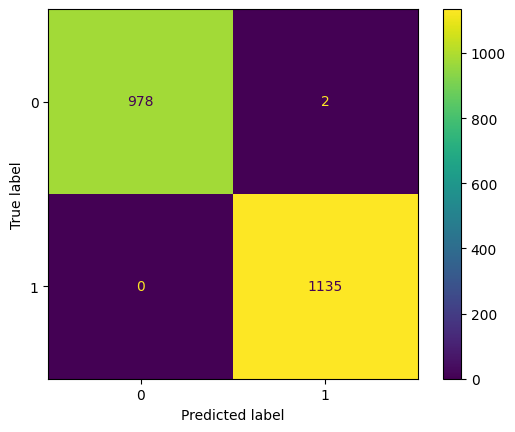

CL TRAIN!!
Epoch 0  CELoss: 0.1175, KLLoss: 0.0107, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.04881832956408079 0.01362862466619565
Validation accuracy (for last task) 0.9421487603305785
Fraction of nonzero parameters 0.9999465521695365
Total validation accuracy 0.9676113360323887


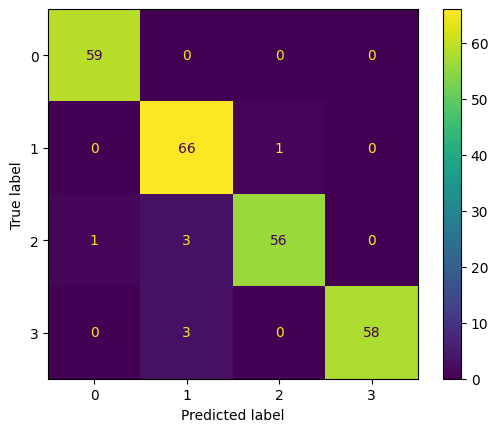

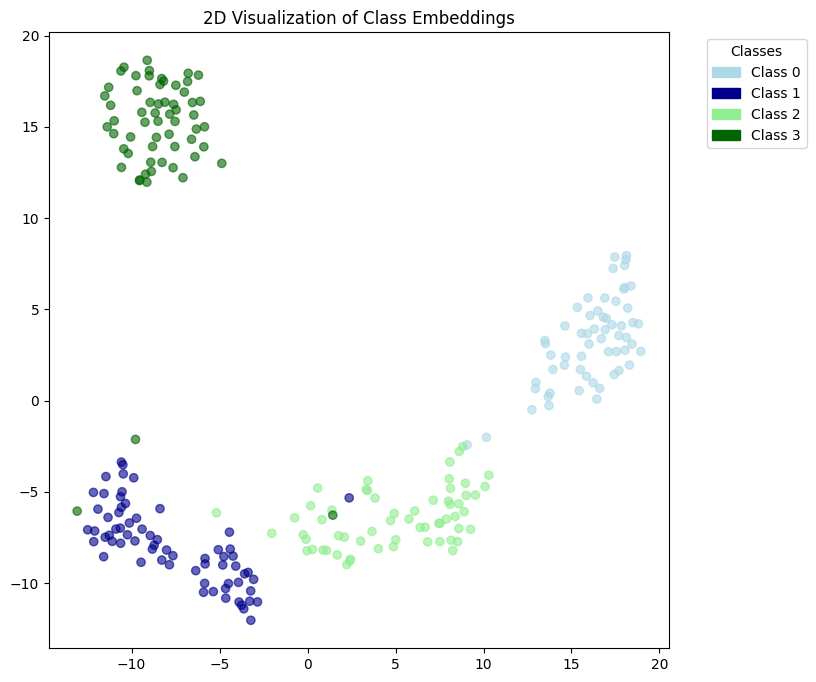



Epoch 1  CELoss: 0.0542, KLLoss: 0.0084, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.035812164415032245 0.008831092469895689
Validation accuracy (for last task) 0.9586776859504132
Fraction of nonzero parameters 0.9999599141271523
Total validation accuracy 0.9676113360323887


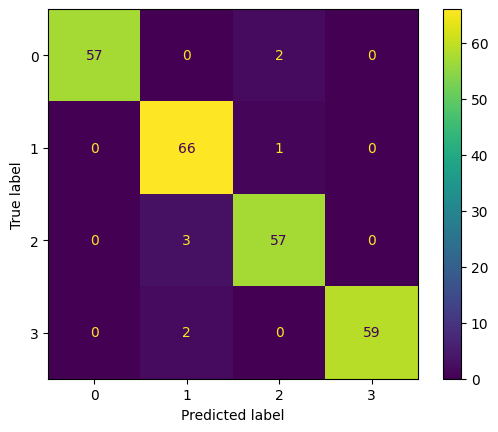

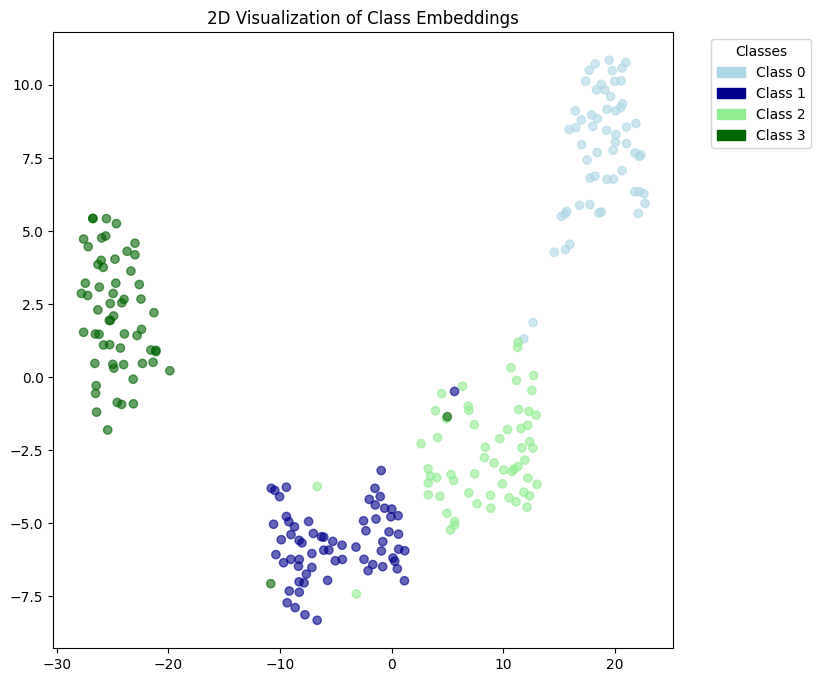



Epoch 2  CELoss: 0.0434, KLLoss: 0.0076, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.04684506950434297 0.008913974358270375
Validation accuracy (for last task) 0.9586776859504132
Fraction of nonzero parameters 0.9999554601412804
Total validation accuracy 0.9676113360323887


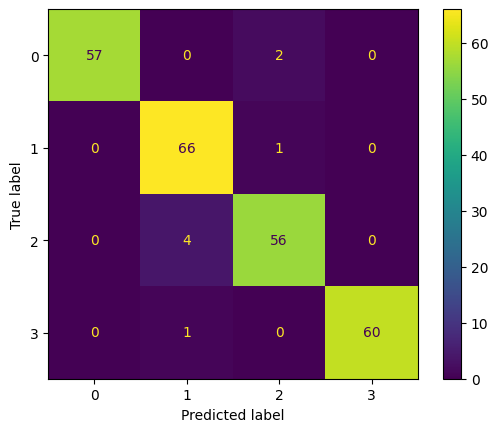

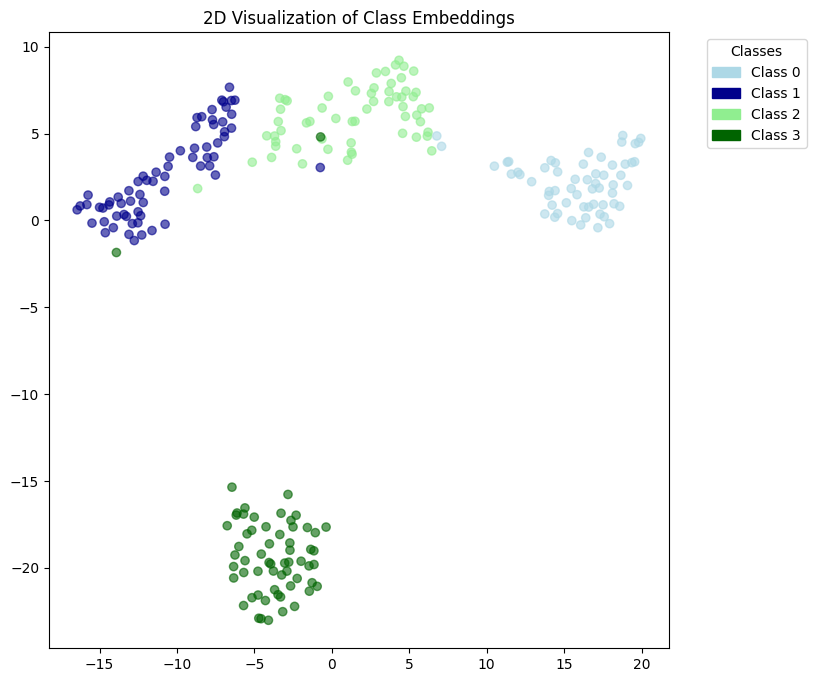



Epoch 3  CELoss: 0.0328, KLLoss: 0.0070, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.04688936648800826 0.006472969969483809
Validation accuracy (for last task) 0.9669421487603306
Fraction of nonzero parameters 0.9999376441977926
Total validation accuracy 0.951417004048583


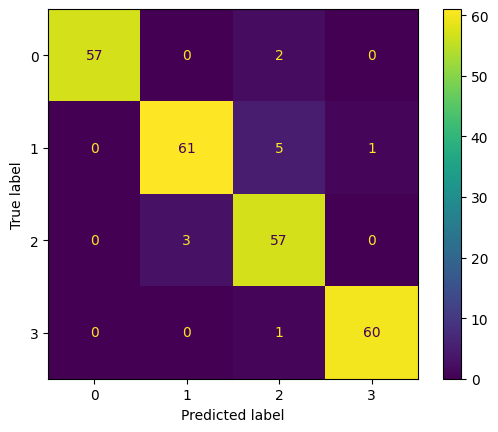

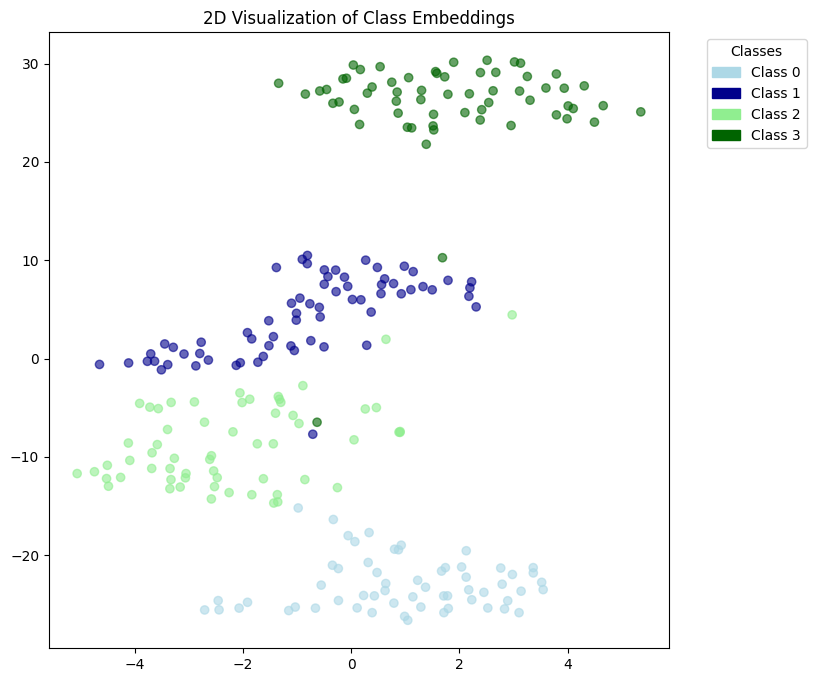



Epoch 4  CELoss: 0.0302, KLLoss: 0.0065, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.04648235902053644 0.00646783911473064
Validation accuracy (for last task) 0.9917355371900827
Fraction of nonzero parameters 0.9999777300706402
Total validation accuracy 0.8785425101214575


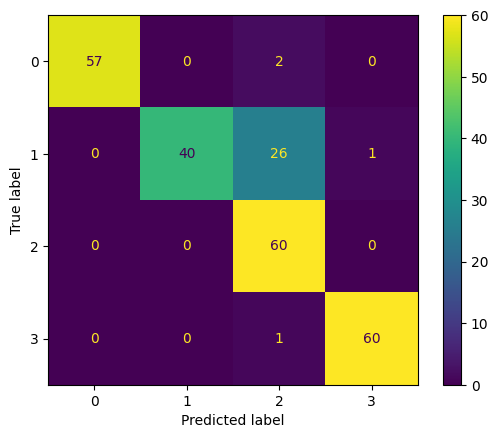

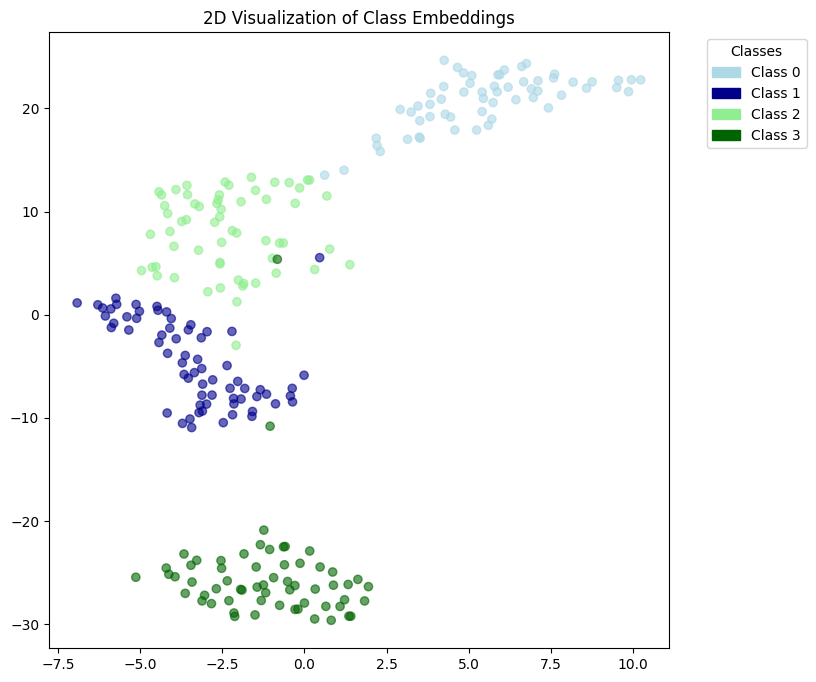



Epoch 5  CELoss: 0.0280, KLLoss: 0.0062, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.019439243051098086 0.009199917833589448
Validation accuracy (for last task) 0.9752066115702479
Fraction of nonzero parameters 0.9999732760847683
Total validation accuracy 0.9635627530364372


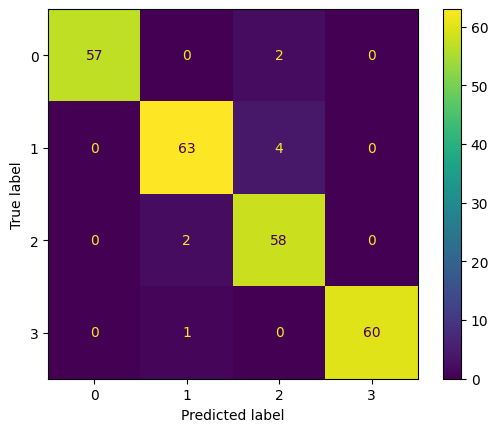

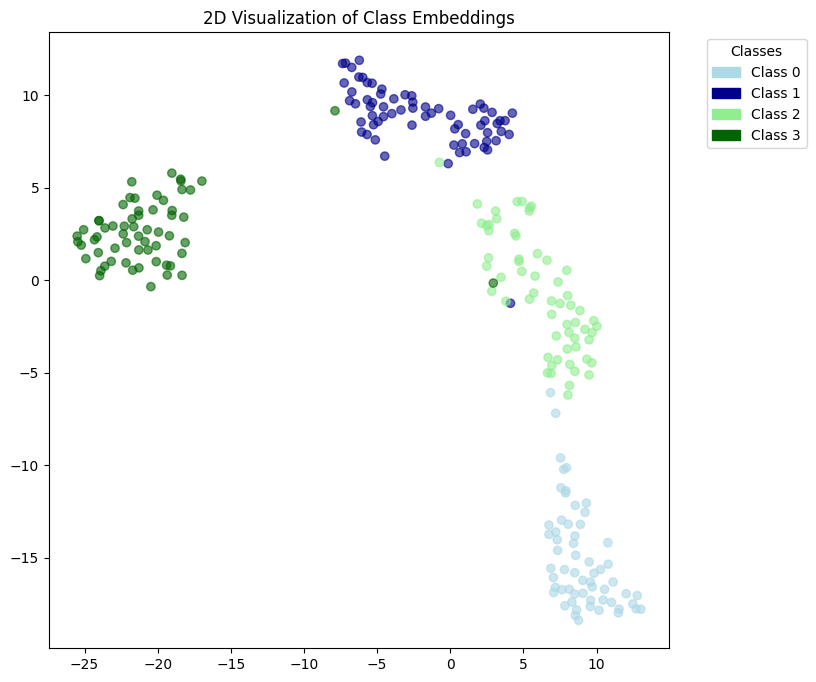

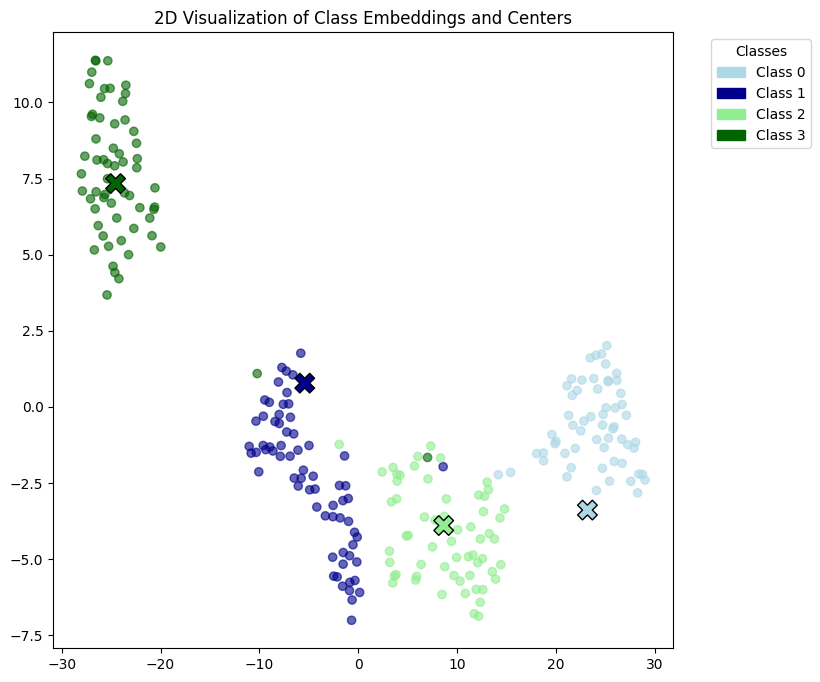

ITERATION 2
ACCURACIES PER SET:
0.9966903073286052 0.9990205680705191 Accuracy on tasks so far: 0.9581428915082992


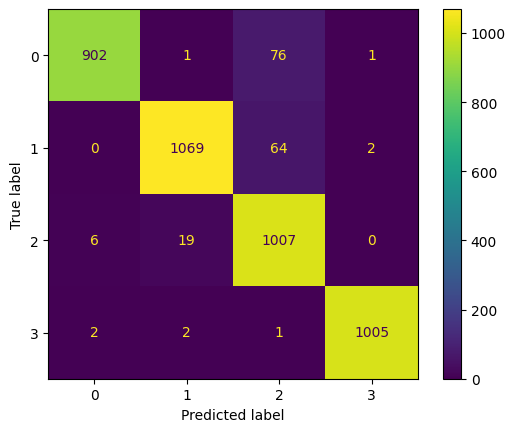

CL TRAIN!!
Epoch 0  CELoss: 0.0510, KLLoss: 0.0088, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.023142137953376125 0.007428928122559834
Validation accuracy (for last task) 0.8660714285714286
Fraction of nonzero parameters 0.9999599831039773
Total validation accuracy 0.9164345403899722


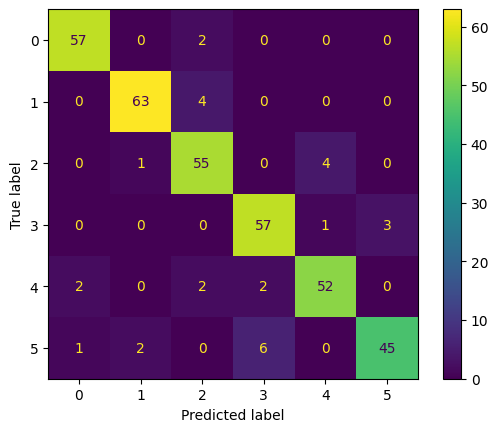

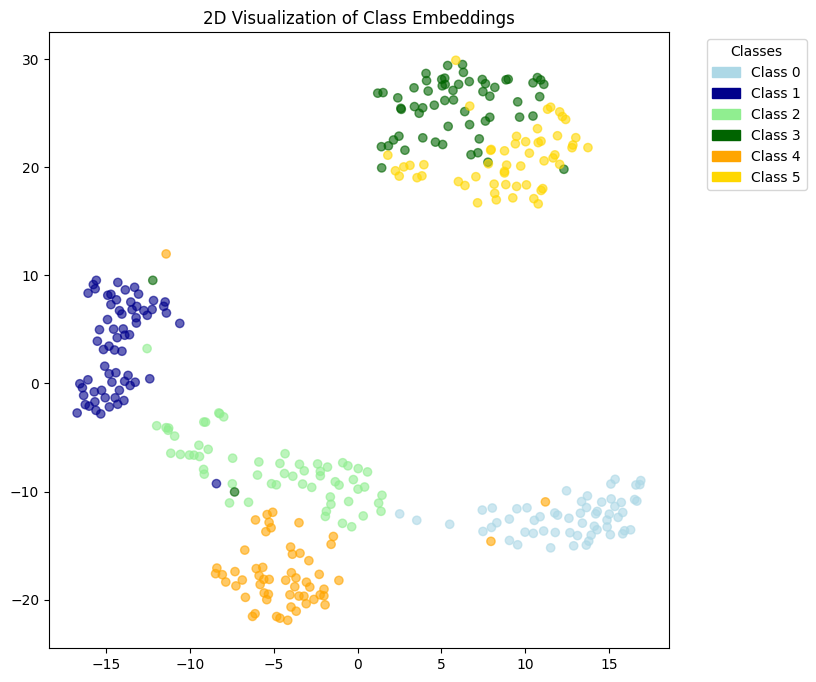



Epoch 1  CELoss: 0.0227, KLLoss: 0.0066, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.007463590772204043 0.006501027134011868
Validation accuracy (for last task) 0.9196428571428571
Fraction of nonzero parameters 0.999986661034659
Total validation accuracy 0.9220055710306406


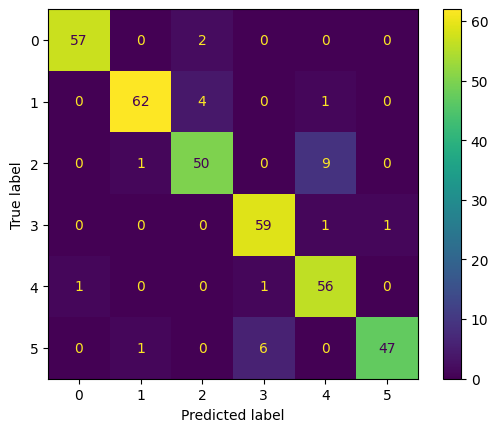

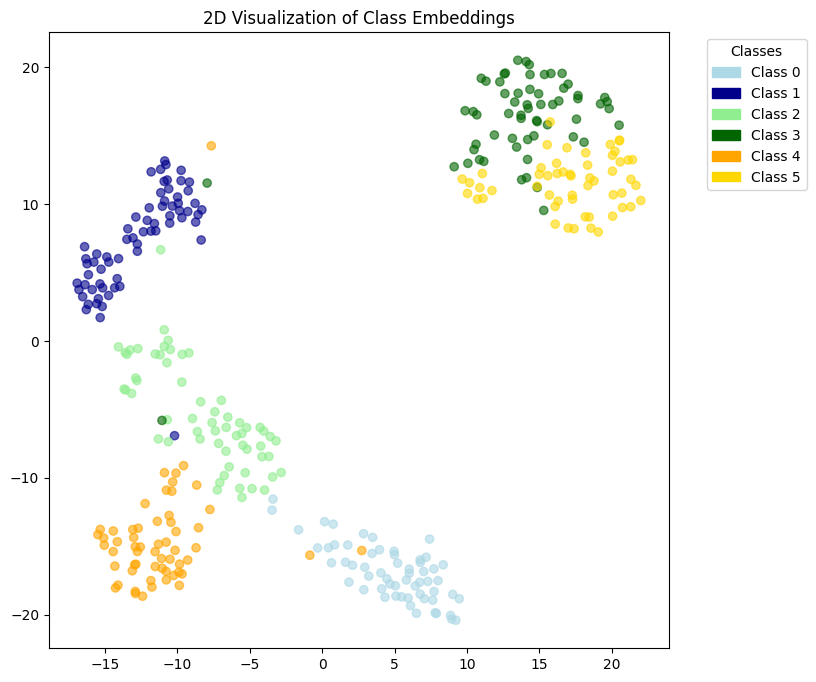

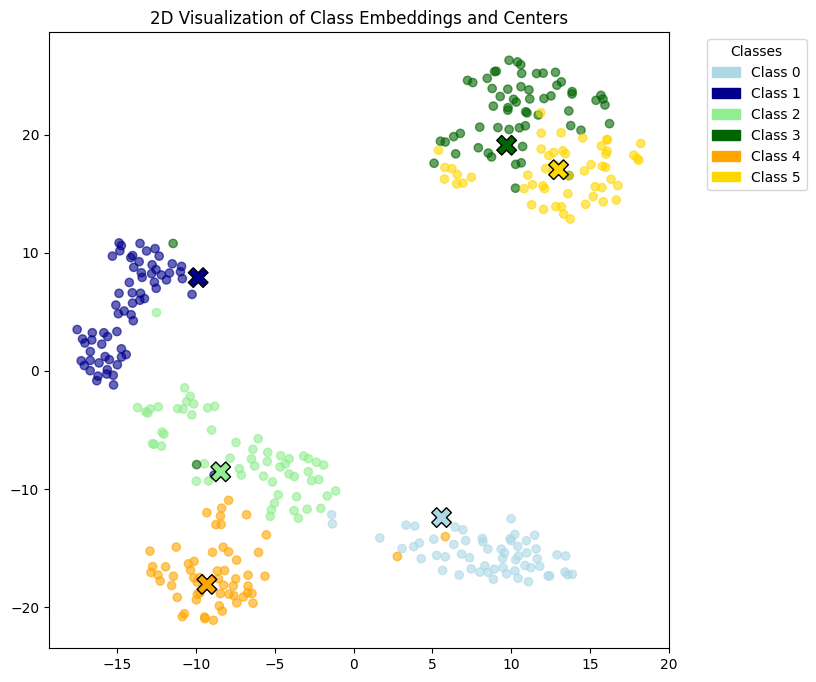

ITERATION 3
ACCURACIES PER SET:
0.9962174940898345 0.9980411361410382 0.9973319103521878 Accuracy on tasks so far: 0.9214060686453325


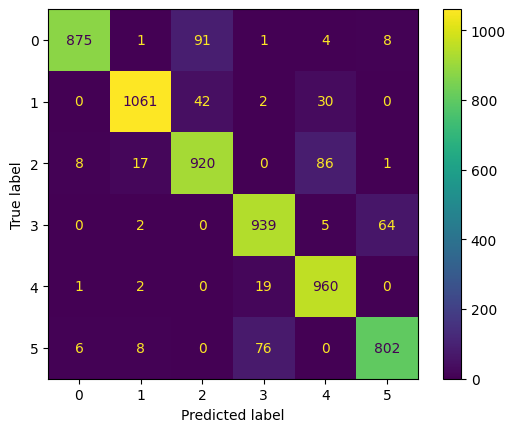

CL TRAIN!!
Epoch 0  CELoss: 0.0371, KLLoss: 0.0078, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.008164192648389591 0.010061622104750803
Validation accuracy (for last task) 0.9344262295081968
Fraction of nonzero parameters 0.9999778065799052
Total validation accuracy 0.9126819126819127


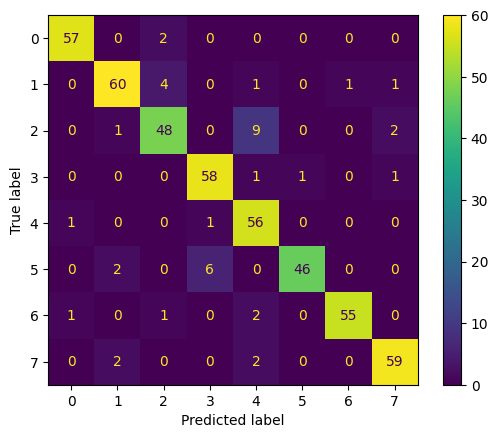

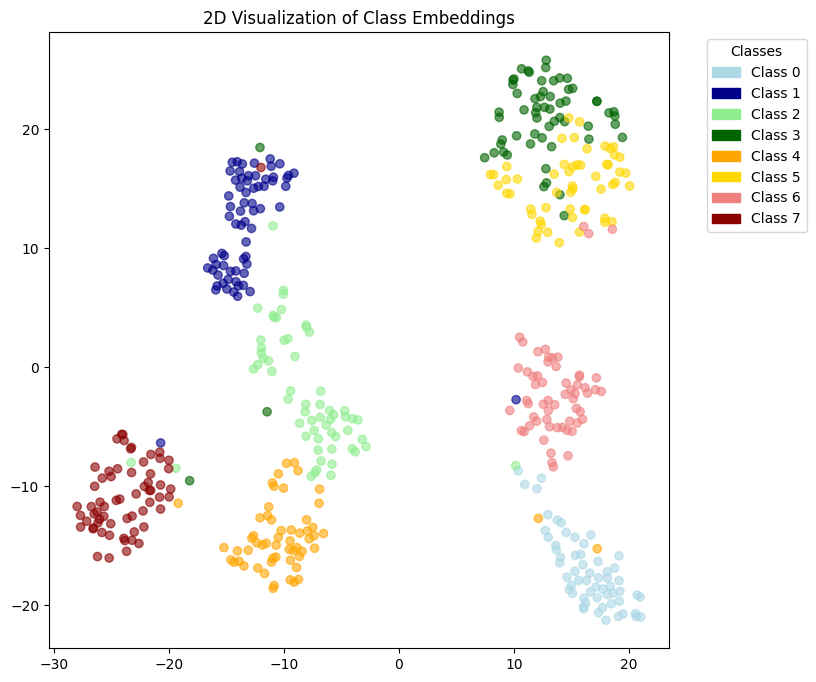



Epoch 1  CELoss: 0.0125, KLLoss: 0.0060, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.0017052410663521956 0.006864341173730701
Validation accuracy (for last task) 0.9672131147540983
Fraction of nonzero parameters 0.9999334197397156
Total validation accuracy 0.920997920997921


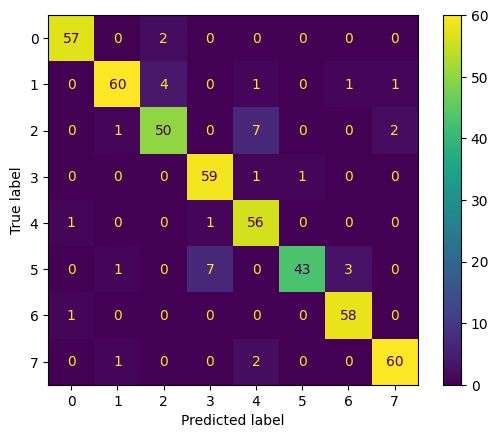

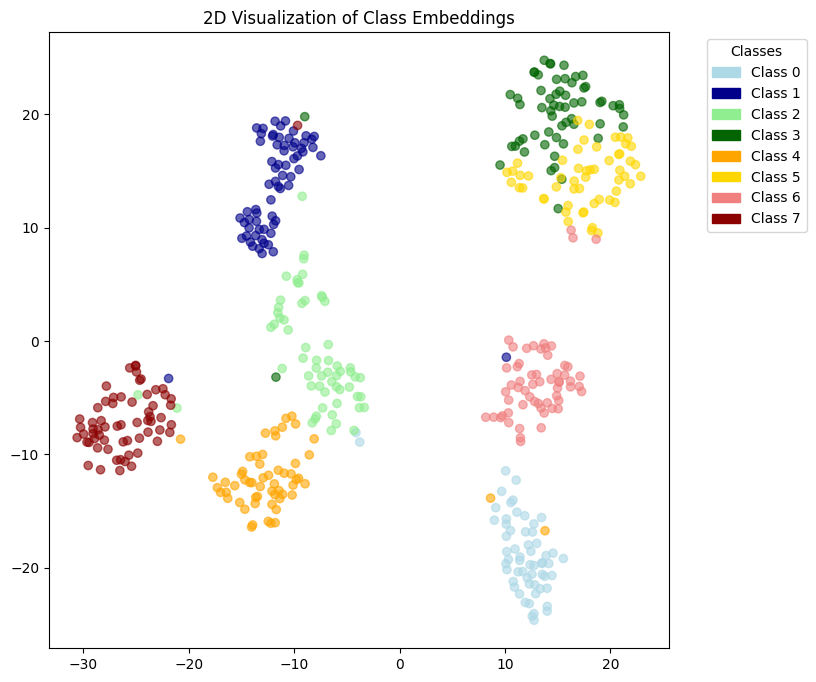

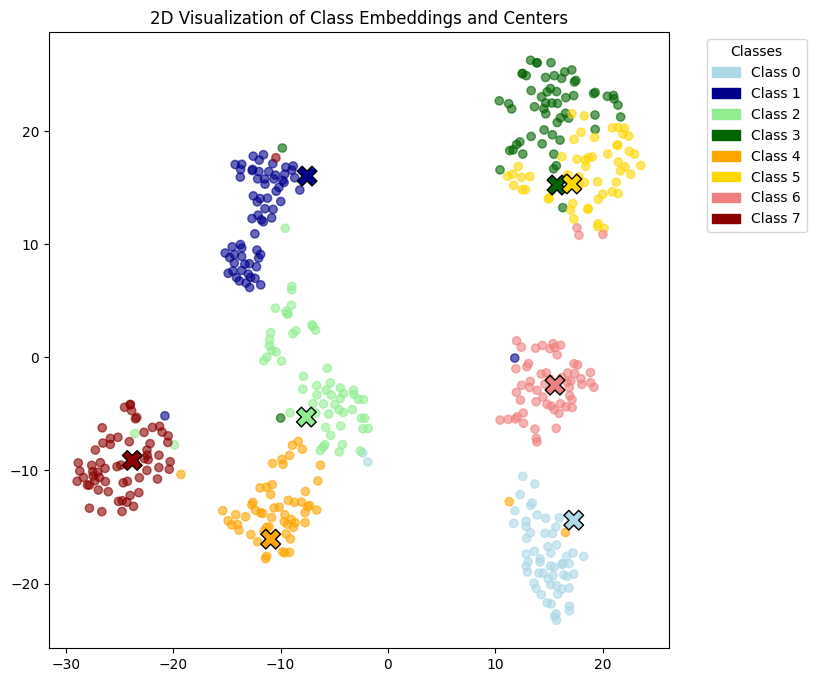

ITERATION 4
ACCURACIES PER SET:
0.9962174940898345 0.9970617042115573 0.9967982924226254 0.9979859013091642 Accuracy on tasks so far: 0.904702507172259


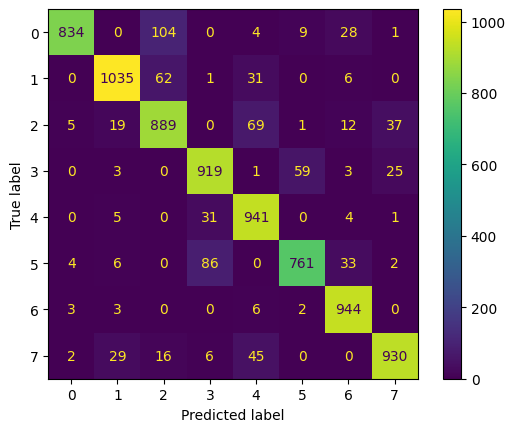

CL TRAIN!!
Epoch 0  CELoss: 0.0710, KLLoss: 0.0114, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.02496898379952957 0.009365740270974735
Validation accuracy (for last task) 0.7310924369747899
Fraction of nonzero parameters 0.9999778446377376
Total validation accuracy 0.8466666666666667


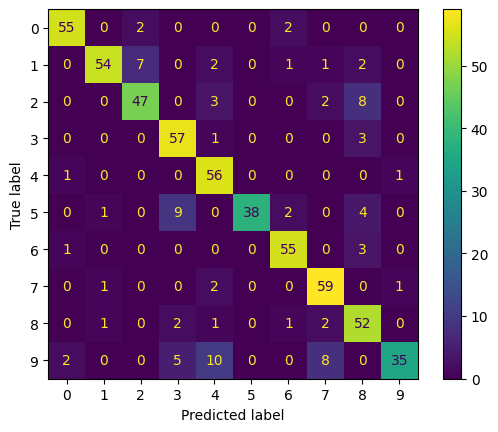

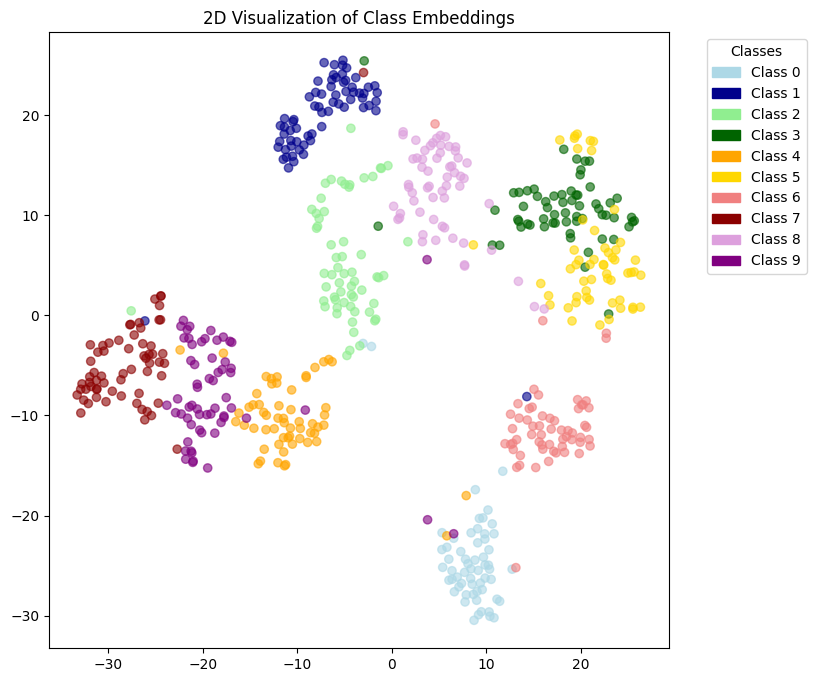



Epoch 1  CELoss: 0.0327, KLLoss: 0.0087, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.04281466386116032 0.007226606969197746
Validation accuracy (for last task) 0.865546218487395
Fraction of nonzero parameters 0.9999512582030229
Total validation accuracy 0.8633333333333333


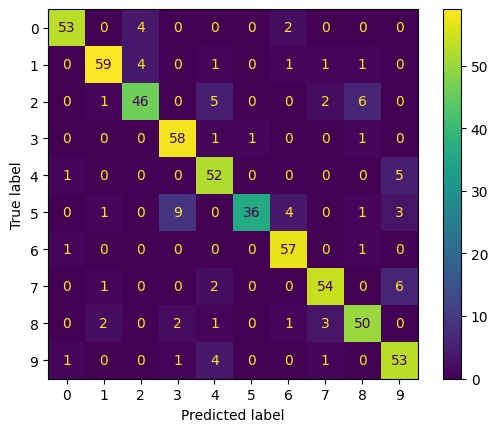

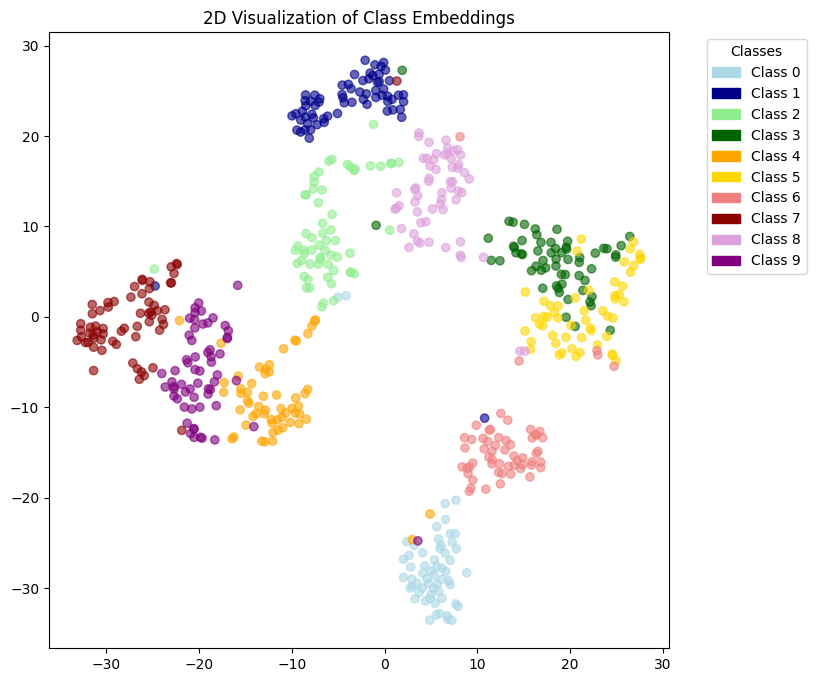



Epoch 2  CELoss: 0.0272, KLLoss: 0.0084, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Buffer loss:  0.0  buffer size  0
Validation losses: 0.021979158889735118 0.014170455911274379
Validation accuracy (for last task) 0.8403361344537815
Fraction of nonzero parameters 0.999942396058118
Total validation accuracy 0.86


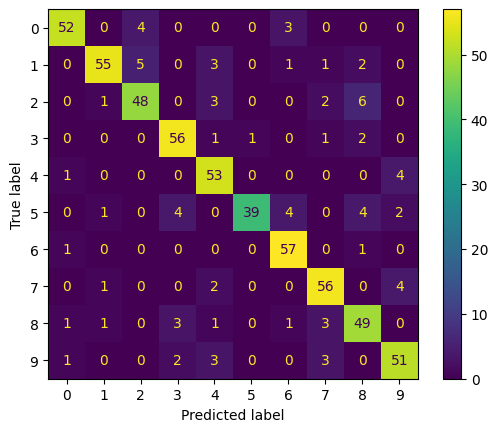

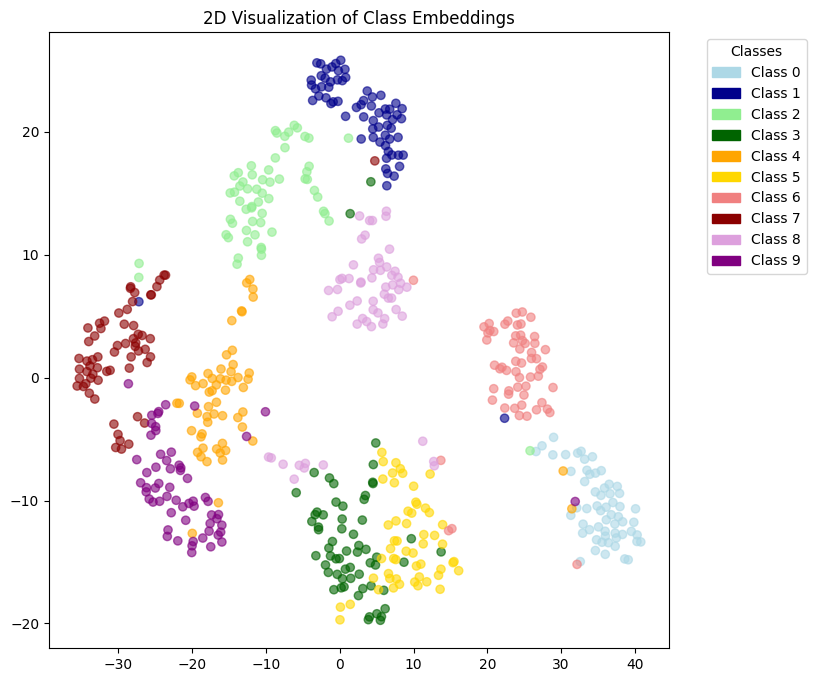

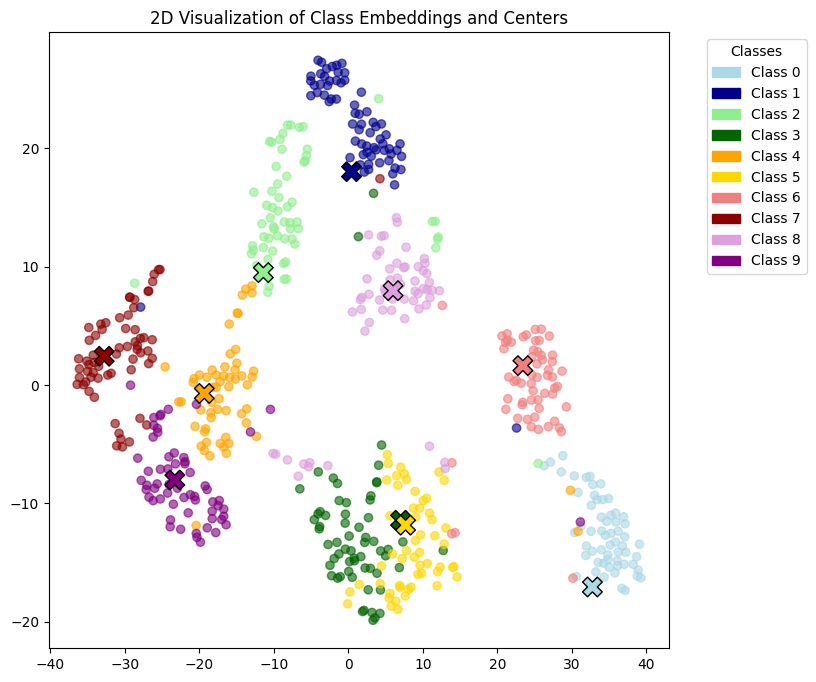

ITERATION 5
ACCURACIES PER SET:
0.9947990543735225 0.9951028403525954 0.996264674493063 0.9969788519637462 0.994452849218356 Accuracy on tasks so far: 0.8541


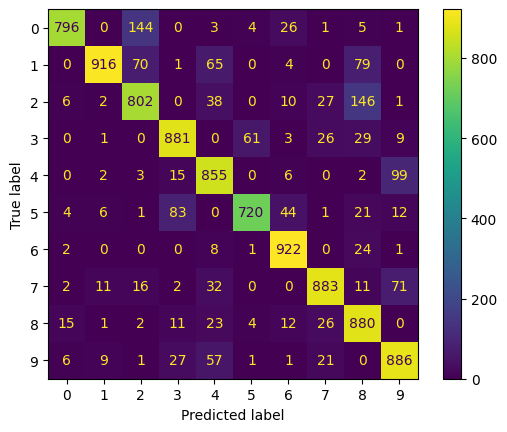

In [4]:
from sklearn import metrics
import matplotlib.pyplot as plt
prevModel = None
for i in range(ITERATIONS):
    model = Net((i+1)*(CLASSES_PER_ITER+1))
    if prevModel is not None:
        with torch.no_grad():
            model.copyPrev(prevModel)
    train_loader = globals.trainloaders[i]
    val_loader = globals.valloaders[i]
    if prevModel:
        print("CL TRAIN!!")
        train_model_CL(model, prevModel, train_loader, val_loader, i, True, 1000, True, freeze_nonzero_params=False, l1_reg_strength=0, ewc_reg_strength = 0, kd_reg_strength=1, withBuffer=False, distance_embeddings_strength=0, centerLossStrength=0)
        #train_model_CL(model, prevModel, train_loader, val_loader, i, True, 4, True, freeze_nonzero_params=False, l1_reg_strength=0, ewc_reg_strength = 10000//2, kd_reg_strength=1, withBuffer=False, distance_embeddings_strength=0.0001, centerLossStrength=0.02, centerLossCenters=True)
        #train_model_CL(model, prevModel, train_loader, val_loader, i, True, 1000, True, freeze_nonzero_params=False, l1_reg_strength=0.0, ewc_reg_strength = 10000, kd_reg_strength=1, withBuffer=True, distance_embeddings_strength=0)
    else:
        #train_model(model, train_loader, val_loader, True, epochs=3, l1_reg_strength=0, centerLossStrength = 1, withBuffer=True)#, 35)
        train_model(model, train_loader, val_loader, True, epochs=4, l1_reg_strength=0, centerLossStrength = 0, withBuffer=False)#, 35)
        #train_model(model, train_loader, val_loader, True, epochs=3, l1_reg_strength=0, centerLossStrength = 0.02, withBuffer=False, centerLossCenters=True)#, 35)
    print("ITERATION", i+1)
    print("ACCURACIES PER SET:")
    #fig, axes = plt.subplots(math.ceil((i+1)/3), 3, figsize=(10, 4*math.ceil((i+1)/3)))
    accumPred = []
    all_labels = []
    with torch.no_grad():
        for j in range(i+1):
            val_loader = globals.testloaders[j]
            val_labels = get_labels(val_loader).to(DEVICE)
            all_labels.append(val_labels)
            model.eval()
            pred = model(get_features(val_loader).to(DEVICE))
            model.train()
            accumPred.append(pred)
            sliced_pred = pred[:, j*(CLASSES_PER_ITER+1):(j+1)*(CLASSES_PER_ITER+1)]
            _, predicted = torch.max(sliced_pred, 1)  # Get the class predictions
            predicted += j*CLASSES_PER_ITER
            correct = (predicted == val_labels).sum().item()  # Count how many were correct
            accuracy = correct / val_labels.size(0)  # Accuracy as a percentage
            print(str(accuracy), end=' ')

    accumPred = torch.cat(accumPred)
    all_labels = torch.cat(all_labels)
    predicted = []
    for x in accumPred:
        x_pred = x[[i for i in range(x.size(0)) if (i + 1) % (CLASSES_PER_ITER+1) != 0]]
        x_pred = torch.softmax(x_pred, dim=-1)
        max = 0
        for (k, v) in enumerate(x_pred):
            if v > max:# and x_unc[i//2]/2 < v:
                max = v
                p = k
        predicted.append(p)
    predicted = torch.tensor(predicted).to(DEVICE)
    correct = (predicted == all_labels).sum().item()  # Count how many were correct
    accuracy = correct / all_labels.size(0)  # Accuracy as a percentage
    print("Accuracy on tasks so far:", accuracy)
    plot_confusion_matrix(predicted.cpu(), all_labels.cpu(), list(range(CLASSES_PER_ITER*(i+1))))
    prevModel = copy.deepcopy(model)